### Heart-stroke prediction

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve
from sklearn.metrics import auc ,roc_auc_score ,precision_score ,recall_score
from sklearn.metrics import classification_report

In [7]:
data =pd.read_excel(r'C:\Users\Zulfiqar Ali\Desktop\sir\excel\mergingfs2.xlsx')

In [8]:
X = data.iloc[: ,:-1].values
y = data.iloc[: ,51].values 

In [9]:
X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20 ,random_state = 0)

In [ ]:
with open('testfile.csv', 'w') as FOUT:
    np.savetxt(FOUT, a_test)

In [147]:
train = pd.read_csv("train_2v.csv")
test = pd.read_csv("test_2v.csv")
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [13]:
test.head() #Test data is not labelled

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


In [14]:
print('Train Data Shape:{}'.format(train.shape))
print('Test Data Shape:{}'.format(test.shape))

Train Data Shape:(43400, 12)
Test Data Shape:(18601, 11)


### Checking Missing Values

In [15]:
train_missing_values = train.isnull().sum()
train_missing_values

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [16]:
test_missing_values = test.isnull().sum()
test_missing_values

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   591
smoking_status       5751
dtype: int64

## Data preprocessing
##### Clean the missing values both from traing and testing data.

In [17]:
train_data = train.dropna(axis=0,how="any")
test_data = test.dropna(axis = 0 ,how="any")
print('Train Data Shape:{}'.format(train_data.shape))
print('Test Data Shape:{}'.format(test_data.shape))

Train Data Shape:(29072, 12)
Test Data Shape:(12423, 11)


##### Checking unique values in a dataset

In [18]:
train_data["stroke"].unique()

array([0, 1], dtype=int64)

In [19]:
train_data["smoking_status"].unique()

array(['never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [21]:
train_data["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

####  Finding the no.of Patients affected by stroke

In [23]:
train_data["stroke"].value_counts()

0    28524
1      548
Name: stroke, dtype: int64

Text(0.5, 1.0, 'No.of Patients affected by stroke')

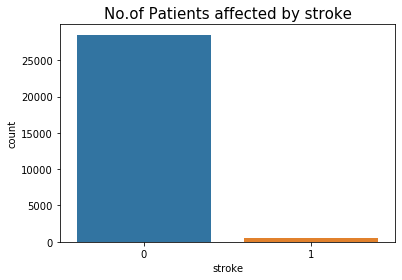

In [25]:
sns.countplot(x=train_data["stroke"])
plt.title("No.of Patients affected by stroke" ,fontsize =15)

### Finding the gender count

In [26]:
train_data["gender"].value_counts()

Female    17852
Male      11213
Other         7
Name: gender, dtype: int64

#### Grouping the gender based on stroke

In [28]:
train_data.groupby(["gender"])["stroke"].value_counts()

gender  stroke
Female  0         17539
        1           313
Male    0         10978
        1           235
Other   0             7
Name: stroke, dtype: int64

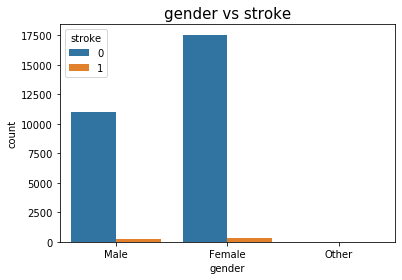

In [29]:
sns.countplot(x =train_data["gender"] ,hue=train_data["stroke"])
plt.title("gender vs stroke" ,fontsize =15)
plt.show()

#### Finding the smoking0status count

In [30]:
train_data["smoking_status"].value_counts()

never smoked       15747
formerly smoked     7099
smokes              6226
Name: smoking_status, dtype: int64

### Grouping the smoking_status based on stroke

In [31]:
train_data.groupby(["smoking_status"])["stroke"].value_counts()

smoking_status   stroke
formerly smoked  0          6919
                 1           180
never smoked     0         15491
                 1           256
smokes           0          6114
                 1           112
Name: stroke, dtype: int64

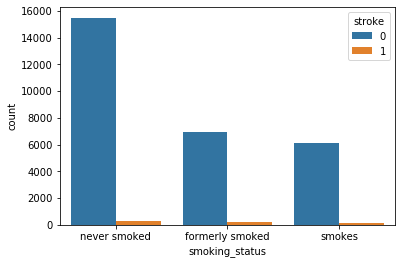

In [33]:
sns.countplot(x=train_data["smoking_status"],hue =train_data["stroke"])
plt.show()

###  separating data into two parts(object & integer)

In [49]:
str_data = train_data.select_dtypes(include=['object'])

In [50]:
str_dt =test_data.select_dtypes(include=['object'])

In [51]:
int_data =train_data.select_dtypes(include=['integer',"float"])
int_dt =test_data.select_dtypes(include=['integer',"float"])

# LabelEncoder
#### Applying LabelEncoder to convert object into interger

In [52]:
label = LabelEncoder()
features = str_data.apply(label.fit_transform)
features = features.join(int_data)
features.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
1,1,1,2,1,1,30468,58.0,1,0,87.96,39.2,0
3,0,1,2,0,0,56543,70.0,0,0,69.04,35.9,0
6,0,1,2,1,0,52800,52.0,0,0,77.59,17.7,0
7,0,1,3,0,1,41413,75.0,0,1,243.53,27.0,0
8,0,1,2,0,2,15266,32.0,0,0,77.67,32.3,0


### Defining features and label

In [75]:
ytrain = features["stroke"]
ytrain.head()

1    0
3    0
6    0
7    0
8    0
Name: stroke, dtype: int64

In [76]:
xtrain = features.drop(["stroke" ,"id"] ,axis=1)

### split the data training and testing

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train ,x_test ,y_train ,y_test =train_test_split(xtrain ,ytrain)

In [79]:
x_train.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi
35658,0,1,2,1,0,28.0,0,0,86.47,30.0
34806,1,1,2,1,1,69.0,1,0,80.27,37.5
40070,1,1,3,1,2,58.0,0,0,204.36,44.4
22156,0,1,2,1,0,81.0,0,0,88.88,22.4
7758,1,0,2,0,1,82.0,1,1,170.44,23.6


## Building NaiveBayes Model

In [80]:
model = GaussianNB()
model.fit(x_train ,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [81]:
predict = model.predict(x_test)
predict

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
test_score = model.score(x_test,y_test)
print("NBtest_score:",test_score)

NBtest_score: 0.9221243808475509


In [109]:
train_score = model.score(x_train ,y_train)
print("NBtrain_score:",train_score)

NBtrain_score: 0.9235461383232434


## Crossvalidation

In [85]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model ,xtrain,ytrain,cv=5)
cv_results

{'fit_time': array([0.03597116, 0.01998734, 0.01798964, 0.0199883 , 0.01798844]),
 'score_time': array([0.00499845, 0.00500178, 0.00399756, 0.00499916, 0.00499797]),
 'test_score': array([0.92605331, 0.91711092, 0.92380461, 0.92724458, 0.92707258])}

#### NaiveBayes Confusion Matrix

In [86]:
nb_conf_mtr  =pd.crosstab(y_test ,predict)
nb_conf_mtr

col_0,0,1
stroke,,
0,6663,460
1,106,39


#### Classification Report for naivebayes

In [87]:
nbreport = classification_report(y_test ,predict)
print(nbreport)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      7123
           1       0.08      0.27      0.12       145

    accuracy                           0.92      7268
   macro avg       0.53      0.60      0.54      7268
weighted avg       0.97      0.92      0.94      7268



# Building Decision Tree Model

In [88]:
dt_mod = DecisionTreeClassifier(criterion='entropy',max_depth=8)
dt_mod.fit(x_train ,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [89]:
y_pred = dt_mod.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [91]:
ts_dt_score = dt_mod.score(x_test ,y_test)
print("DT test score:",ts_dt_score)

DT test score: 0.9767473858007705


In [94]:
dt_report = classification_report(y_test ,y_pred)
print(dt_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7123
           1       0.00      0.00      0.00       145

    accuracy                           0.98      7268
   macro avg       0.49      0.50      0.49      7268
weighted avg       0.96      0.98      0.97      7268



# Building Neural Networks

In [95]:
mlp_model = MLPClassifier()
mlp_model.fit(x_train ,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [96]:
mlp_predict = mlp_model.predict(x_test)
mlp_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
ts_mlp_score =mlp_model.score(x_test ,y_test)
print("NNtest_score:" ,ts_mlp_score)

NNtest_score: 0.9799119427627958


In [99]:
tr_mlp_score=mlp_model.score(x_train ,y_train)
print("NNtrain_score:" ,tr_mlp_score)

NNtrain_score: 0.9809209319390938


In [101]:
nn_cv_results = cross_validate(mlp_model ,xtrain ,ytrain ,cv=5)
nn_cv_results

{'fit_time': array([16.69344473, 19.38589883, 21.50976634, 15.55109501, 15.78896022]),
 'score_time': array([0.02998304, 0.02898431, 0.02798343, 0.02898359, 0.03298545]),
 'test_score': array([0.9810834 , 0.9810834 , 0.98125215, 0.98125215, 0.98108015])}

In [102]:
nn_report = classification_report(y_test ,mlp_predict)
print(nn_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7123
           1       0.33      0.01      0.01       145

    accuracy                           0.98      7268
   macro avg       0.66      0.50      0.50      7268
weighted avg       0.97      0.98      0.97      7268



# Dimensionality Reduction(PCA)

#### Reducing the Dimensionality using principle component analysis

In [103]:
pca = PCA(n_components=3)
pca= pca.fit(xtrain)
pca

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [104]:
PCtrain =pca.transform(x_train)
PCtrain

array([[-22.00247939,  17.2822716 ,   1.07325766],
       [-23.35185565, -24.34337681,   7.45408169],
       [ 98.87290997,   0.390537  ,  11.47543817],
       ...,
       [ -3.43592778,  -2.62937896,  -3.33019365],
       [-22.25902625,  32.24209205,   5.3945016 ],
       [131.1510092 ,  15.70720502,  -7.52563658]])

In [106]:
PCtest = pca.transform(x_test)
PCtest

array([[-12.80984851, -34.8974177 ,  -3.37047379],
       [-48.03161767,  11.46124703,  -2.83873317],
       [-21.34976835, -29.98770009,   2.12996807],
       ...,
       [-35.11034602,   9.88887775,  -2.5588254 ],
       [ 85.50075675,  -5.73381811,  -2.2129695 ],
       [-26.38015413,   5.77597535,  -0.72395257]])

In [108]:
pca1 = pca.fit(Test)
ts_pca =pca1.transform(Test)
ts_pca

array([[ 8.33648910e+02, -1.91127640e+01, -3.45327573e+01],
       [-2.46893557e+04,  7.41111003e+01, -1.78592387e+01],
       [-3.66135101e+03, -2.13303205e+01, -1.78840243e+01],
       ...,
       [ 3.67776427e+04,  1.07626655e+02, -1.24203494e+00],
       [ 7.30064688e+03,  2.29528056e+01, -2.89669980e+01],
       [ 3.07016497e+04, -3.43848222e+01, -1.16338674e+01]])

In [111]:
score=pd.DataFrame({"score":{"dt_score":ts_dt_score,"nb_score":test_score,"nn_score":ts_mlp_score}})
score

,score
dt_score,0.976747
nb_score,0.922124
nn_score,0.979912


In [125]:
pc_NB_model = GaussianNB()
pc_NB_model.fit(PCtrain ,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [129]:
pc_NB_ts_score=pc_NB_model.score(PCtest ,y_test)
print("pca_NB_test_score:" ,pc_NB_ts_score)

pca_NB_test_score: 0.9790864061640066


In [130]:
pc_NB_tr_score=pc_NB_model.score(PCtrain ,y_train)
print("pca_NB_test_score:" ,pc_NB_tr_score)

pca_NB_test_score: 0.9806457530728306


In [135]:
pc_dt_mod = DecisionTreeClassifier(criterion='entropy',max_depth=8)
pc_dt_mod.fit(PCtrain ,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [136]:
pc_ts_dt_score = pc_dt_mod.score(PCtest ,y_test)
print("PCA _DT test score:",pc_ts_dt_score)

PCA _DT test score: 0.9781232801320858


In [137]:
pc_tr_dt_score = pc_dt_mod.score(PCtrain ,y_train)
print("DT train score:",pc_tr_dt_score)

DT train score: 0.9834434048798386


In [138]:
pc_mlp_model = MLPClassifier()
pc_mlp_model.fit(PCtrain ,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [140]:
pc_ts_mlp_score =pc_mlp_model.score(PCtest ,y_test)
print("PCA_NNtest_score:" ,pc_ts_mlp_score)

PCA_NNtest_score: 0.9800495321959274


In [141]:
pc_tr_mlp_score =pc_mlp_model.score(PCtrain ,y_train)
print("PCA_NN_train_score:" ,pc_tr_mlp_score)

PCA_NN_train_score: 0.981517152815997


In [144]:
score1 = pd.DataFrame({"pc_score":{"pc_nb_score":pc_NB_ts_score ,"pc_nn_score":pc_ts_mlp_score ,"pc_dt_score":pc_ts_dt_score}})
score1

,pc_score
pc_dt_score,0.978123
pc_nb_score,0.979086
pc_nn_score,0.980050
